<a href="https://colab.research.google.com/github/egor-muindor/big-data-labs/blob/master/L5/big_data_lab5_perceptron_multiclass_classification_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ФИО, группа



###Лабораторная работа №5. Распознавание рукописных цифр при помощи однослойного персептрона

В данной лабораторной работе вам предстоит обучить однослойный персептрон распознавать рукописные цифры из набора данных MNIST.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.datasets import mnist
from sklearn.metrics import confusion_matrix

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [2]:
def plot_images(images, titles, columns=5, rows=1, fontsize=20):
    fig=plt.figure(figsize=(20, 10))
    for i, img in enumerate(images[:columns*rows]):
        fig.add_subplot(rows, columns, i + 1)
        plt.axis('off')
        plt.title(titles[i], fontsize=fontsize)
        plt.imshow(img, cmap='gray')
    plt.show()

In [3]:
(X_train_original, y_train), (X_test_original, y_test) = mnist.load_data()
print(X_train_original.shape, X_test_original.shape)

11493376/11490434 [==============================] - 2s 0us/step
(60000, 28, 28) (10000, 28, 28)


Выведите первые 5 изображений из обучающей выборки с помощью функции `plot_images`.

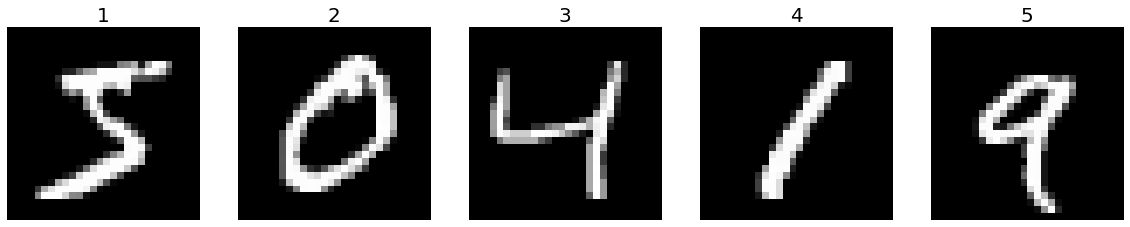

In [7]:
plot_images(X_train_original[:5], range(1,6))

Закодируйте метки классов в виде векторов с помощью one-hot encoding.

*Подсказка: для решения этой задачи удобно использовать функцию `np.eye`.*

In [113]:
y_train_one_hot = np.zeros((y_train.size, y_train.max()+1))
y_train_rows = np.arange(y_train.size)
y_train_one_hot[y_train_rows, y_train] = 1

y_test_one_hot = np.zeros((y_test.size, y_test.max()+1))
y_test_rows = np.arange(y_test.size)
y_test_one_hot[y_test_rows, y_test] = 1

Выполните предобработку данных изображений, чтобы значение каждого пикселя принадлежало множеству $\{0, 1\}$.

In [24]:
X_train = (X_train_original/255).round()
X_test = (X_test_original/255).round()

Выведите первые 5 изображений из обучающей выборки после процедуры предобработки.

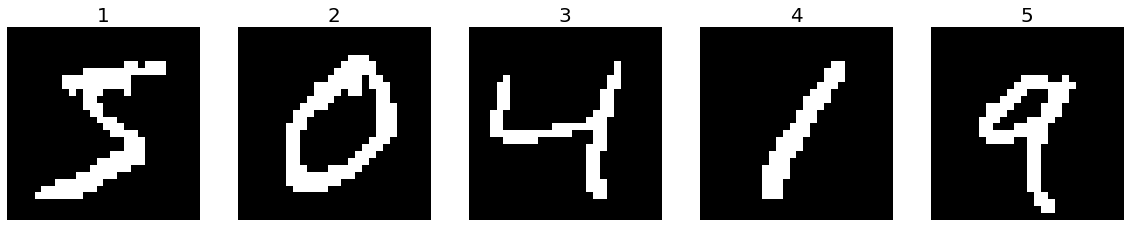

In [25]:
plot_images(X_train[:5], range(1,6))

Ниже представлена заготовка класса персептрона. Реализуйте недостающие части.

In [150]:
class Perceptron:
    def __init__(self, m, k, learning_rate=0.001, num_epochs=20, verbose=False):
        self.m = m # number of features
        self.k = k # number of classes (neurons)
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.verbose = verbose
        self._validation_freq = 1
        self._init_params()
    
    # Initialize weights and biases
    def _init_params(self):
        self.b = np.ones(self.k)
        self.w = np.vstack((np.random.normal(0.0, 0.1, (self.m, self.k)), self.b))
        # self.w = np.random.normal(0.0, 0.1, (self.m, self.k))

    # Heaviside step function
    def _activate(self, x):
      return np.vectorize(lambda x: 1 if x > 0 else 0)(x)
        
    
    # Forward pass
    def predict(self, X):
      return self._activate(np.dot(X, self.w))
        
    
    # Use delta rule to update parameters
    def _update_params(self, x, y, y_pred):
      self.w += self.learning_rate * np.dot(x.reshape((-1, 1)), (y - y_pred).reshape((1, -1)))

    def fit(self, X, y, X_test=None, y_test=None):
        for i in range(self.num_epochs):
            for j in range(X.shape[0]):
                # Compute prediction for X[j]
                y_pred = self.predict(X[j])
                # Update params
                self._update_params(X[j], y[j], y_pred)
                
            if X_test is not None and y_test is not None and self.verbose and (i + 1) % self._validation_freq == 0:
                # Compute predictions for test set and compute accuracy
                total_true = 0
                for k in range(X_test.shape[0]):
                    y_test_pred = self.predict(X_test[k])
                    e_i = y_test[k] - y_test_pred
                    if not any(e_i):
                        total_true += 1

                accuracy = total_true / X_test.shape[0]
                print("Accuracy on {}-th epoch is {:.04f}".format(i+1, accuracy))

Обучите персептрон. Перед подачей изображений на вход персептрону, преобразуйте их в вектора размерности 784.

*Подсказка: для изменения формы массива можно воспользоваться методом `reshape`.*

In [154]:
perceptron = Perceptron(784, 10)
ones = np.ones((X_train.shape[0], 1))
X_train_stacked = np.hstack((X_train.reshape((-1, 784)), ones))
ones = np.ones((X_test.shape[0], 1))
X_test_stacked = np.hstack((X_test.reshape((-1, 784)), ones))
perceptron.fit(X_train_stacked, y_train_one_hot, X_test_stacked, y_test_one_hot)

In [159]:
print(np.argmax(perceptron.predict(X_train_stacked[0])))

5


Вычислите предсказания для тестовой выборки.

*Подсказка: чтобы из one-hot encoding вернуться к десятичным цифрам, можно воспользоваться методом `argmax`.*

In [163]:
y_test_pred = [np.argmax(perceptron.predict(i)) for i in X_test_stacked]

Выведите первые пять изображений из тестовой выборки. В качестве заголовка к каждому изображению выведите ожидаемую (англ. expected) и предсказанную (англ. predicted) метки класса.

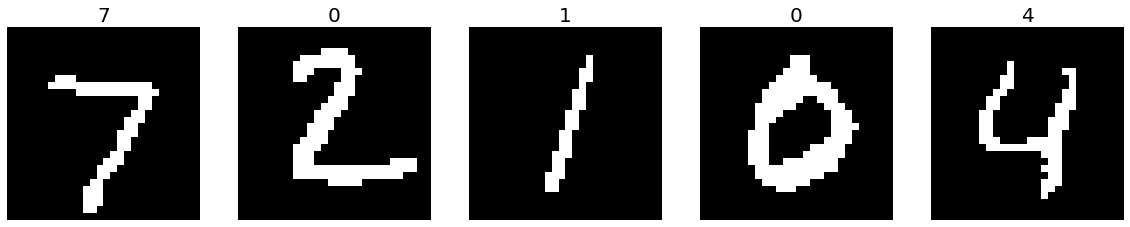

In [164]:
plot_images(X_test[:5], y_test_pred[:5])

Выведите несколько изображений из тестовой выборки, в которых персептрон допустил ошибку. В качестве заголовка к каждому изображению выведите ожидаемую (англ. expected) и предсказанную (англ. predicted) метки класса. Как вы считаете, есть ли в допущенных ошибках какая-то закономерность?


In [171]:
err = []
for x, pred, corr in zip(X_test, y_test_pred, y_test):
  if pred != corr:
    err.append({'img':x, 'pred':pred, 'corr':corr})

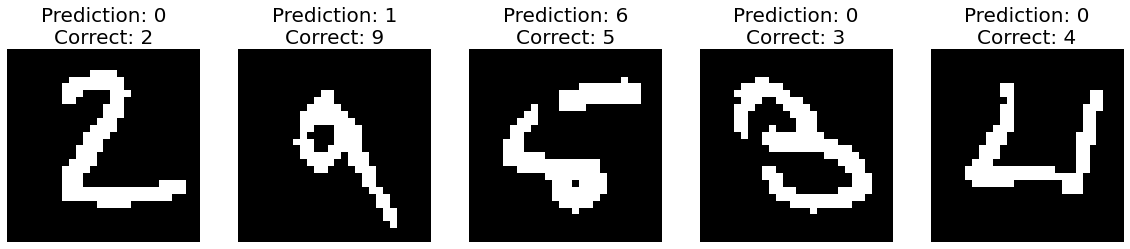

In [172]:
plot_images([i['img'] for i in err[:5]], ['Prediction: {pred}\nCorrect: {corr}'.format(**i) for i in err[:5]])

**Ответ:**

Изобразите веса нейронов в виде изображений. У вас должно получиться 10 изображений. Можно ли по полученным изображениям сделать вывод, за распознавание какой цифры отвечает каждый из нейронов?

*Подсказка: можете посмотреть [пример](https://ml4a.github.io/ml4a/looking_inside_neural_nets/).*

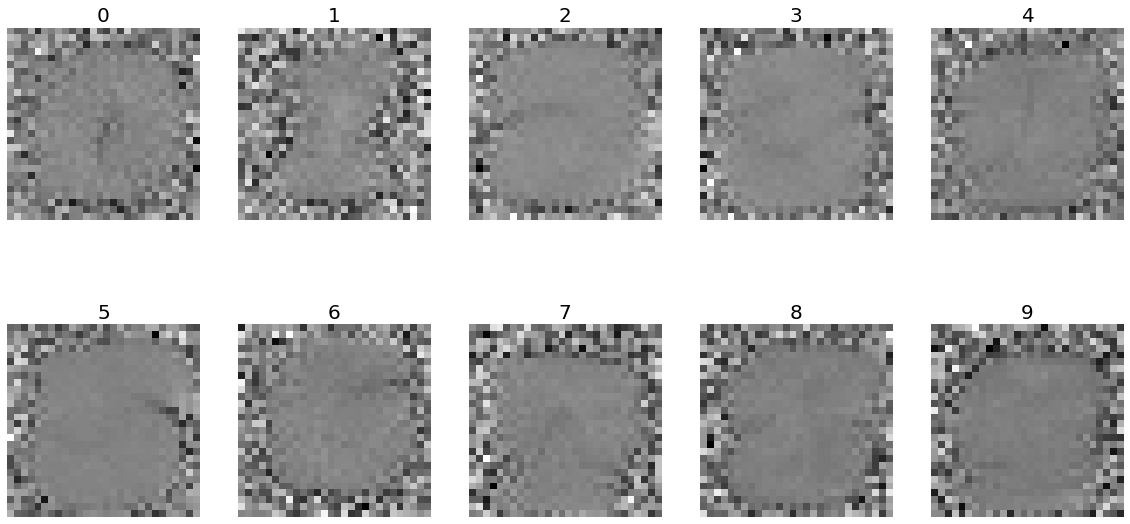

In [183]:
imgs = perceptron.w[:-1, :].reshape((28, 28, 10))
fig = plt.figure(figsize=(20, 10))
for i in range(2 * 5):
  fig.add_subplot(2, 5, i + 1)
  plt.axis('off')
  plt.title(i, fontsize=20)
  plt.imshow(imgs[:, :, i], cmap='gray')
plt.show()

**Ответ:** нет, силуэты цифр трудно различимы, так как используется лишь 1 уровень нейронов.

Постройте матрицу ошибок (англ. confusion matrix) для полученной нейронной сети. 

Подсказка: можно воспользоваться функцией [`sklearn.metrics.confusion_matrix`](https://scikit-learn.org/0.16/modules/generated/sklearn.metrics.confusion_matrix.html). [Пример матрицы ошибок.](https://ml4a.github.io/demos/confusion_mnist/)

In [184]:
cm = confusion_matrix(y_test, y_test_pred)

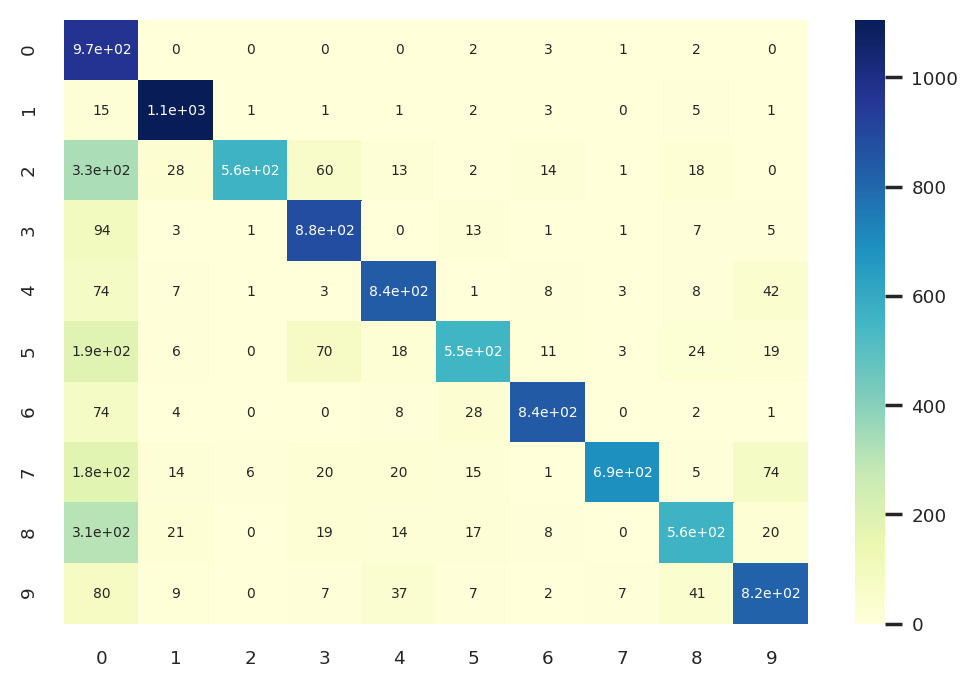

In [185]:
plt.figure(dpi=200)
sns.set(font_scale=0.6)
g = sns.heatmap(cm, annot=True, annot_kws={"size": 5}, cmap="YlGnBu")
plt.show()

По матрице ошибок определите, с какой цифрой нейронная сеть чаще всего путает цифру 3.

**Ответ:** c 0

### Полезные материалы
1. [Looking inside neural nets](https://ml4a.github.io/ml4a/looking_inside_neural_nets/)
2. [THE MNIST DATABASE of handwritten digits](http://yann.lecun.com/exdb/mnist/)